In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt",index_col=0)
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [3]:
#Find the shape of the Data
print("SHAPE: ",data.shape)

print('*******************************')

# Checking for any missing values
print(data.isnull().any())

SHAPE:  (645, 7)
*******************************
Sqft           False
Floor          False
TotalFloor     False
Bedroom        False
Living.Room    False
Bathroom       False
Price          False
dtype: bool


In [4]:
data.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


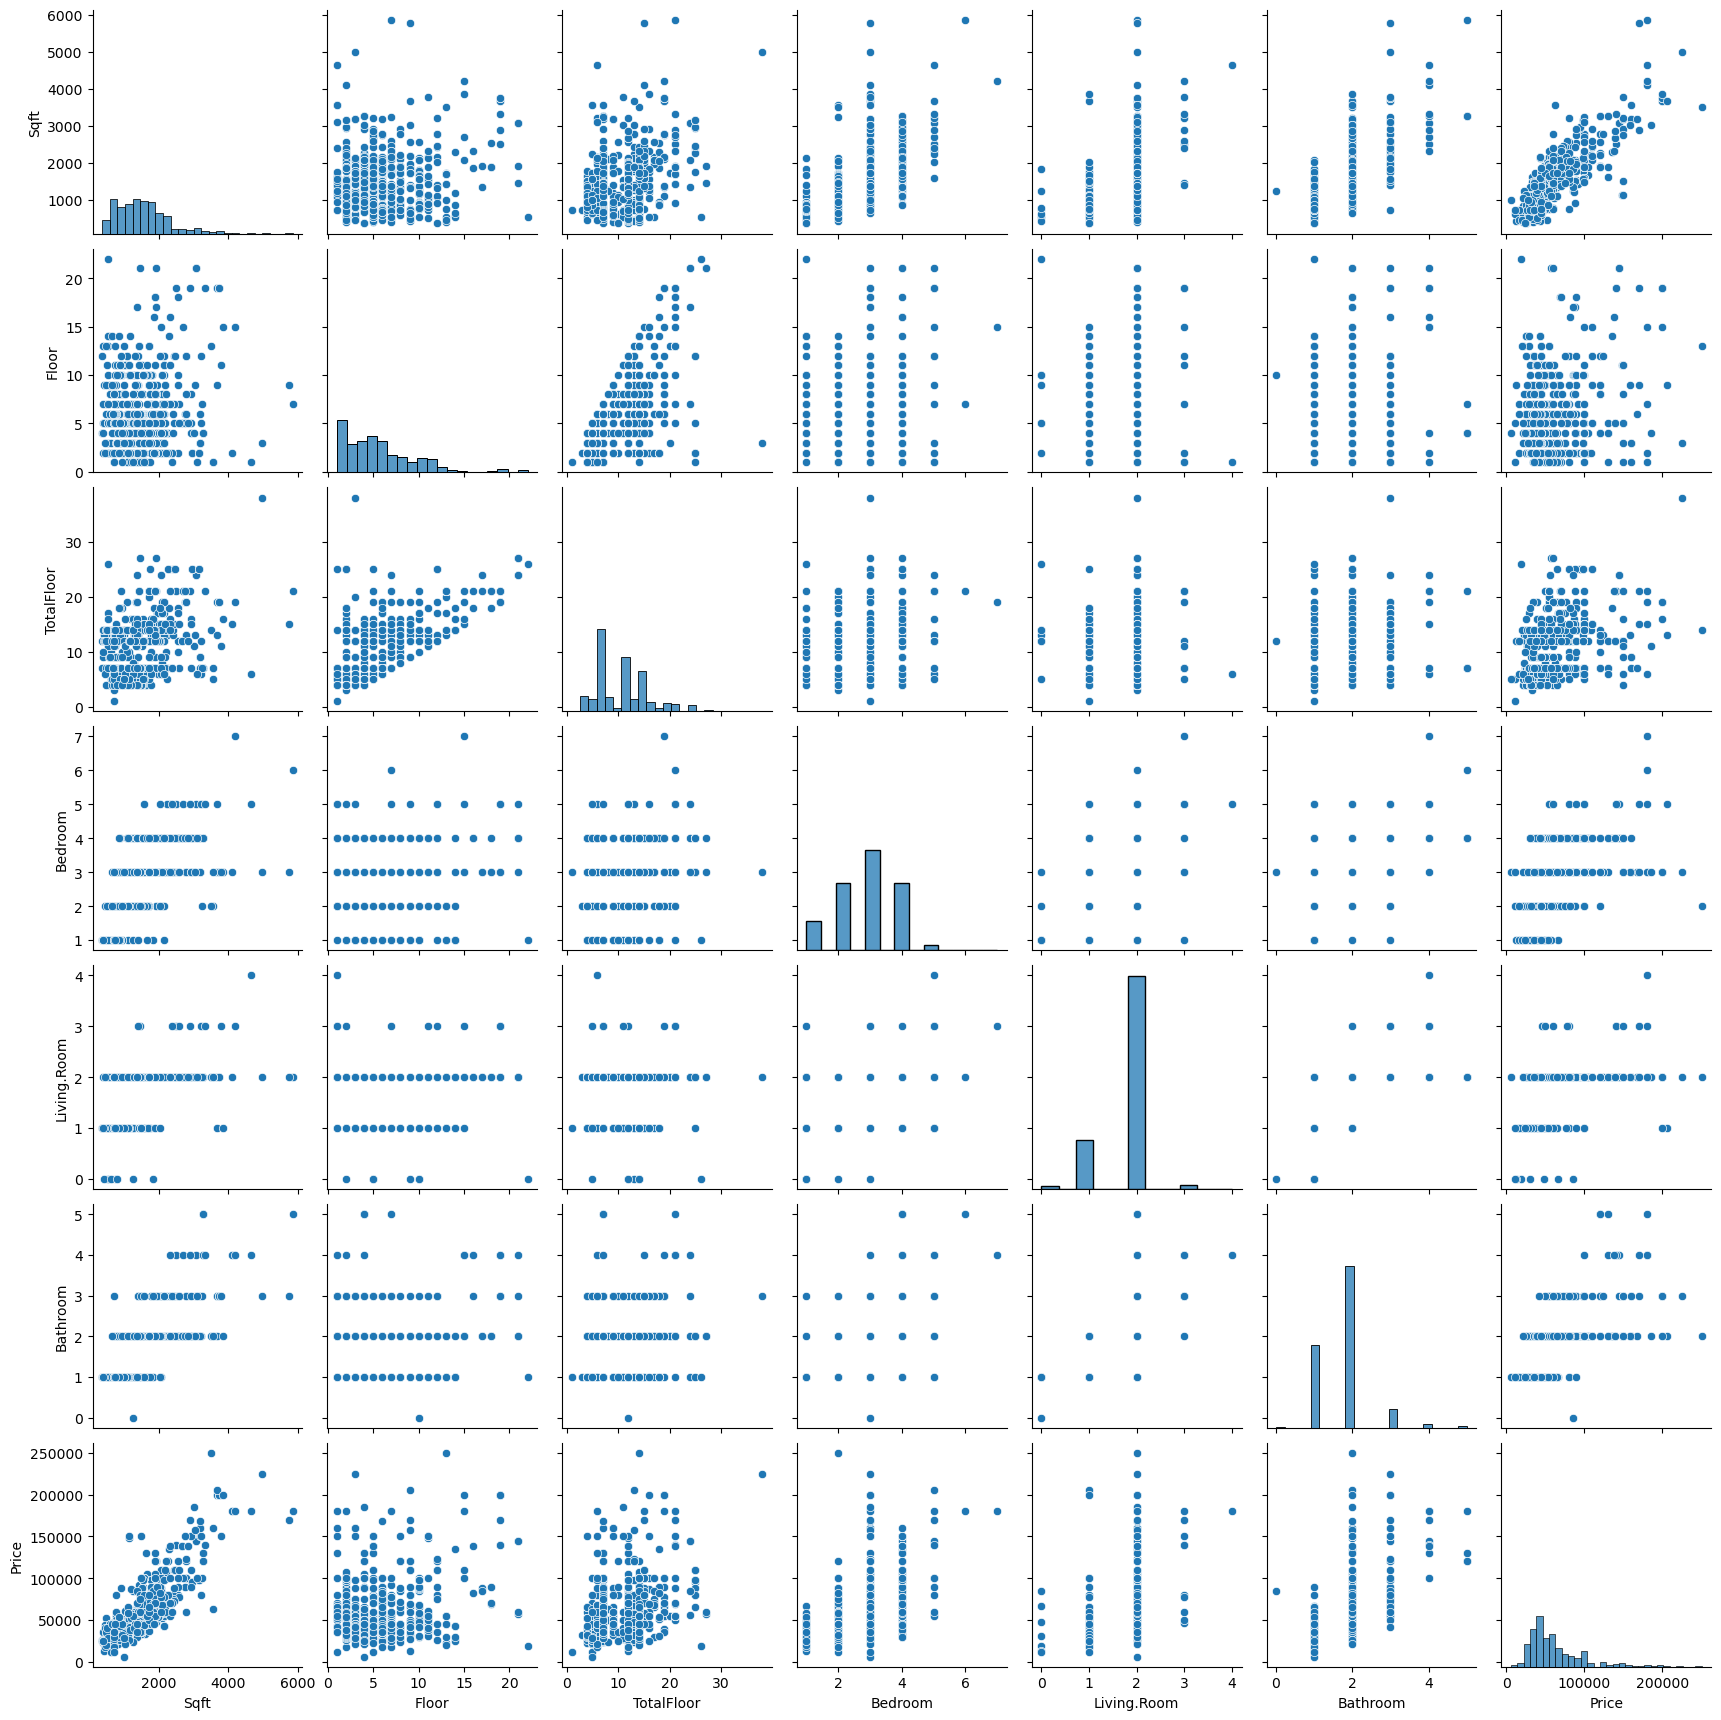

In [5]:
# Visualize the data
sns.pairplot(data, diag_kind="hist")
plt.show()

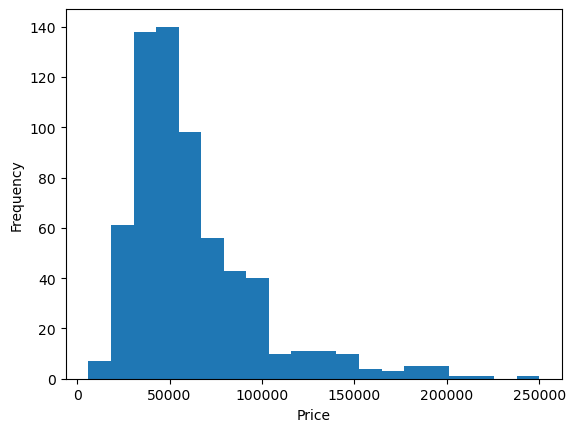

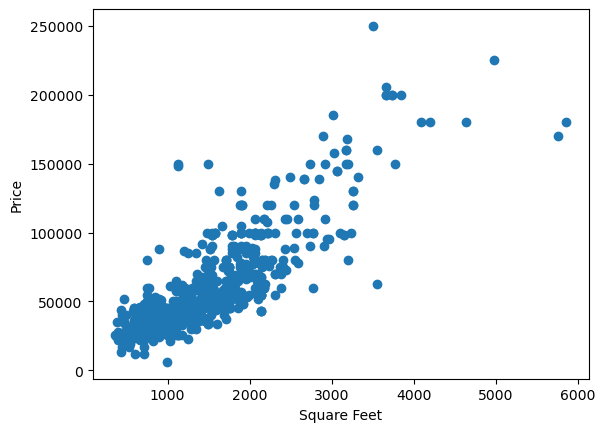

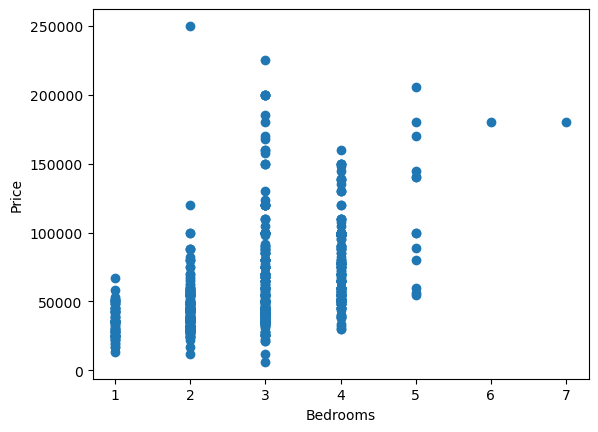

In [6]:
plt.hist(data['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.scatter(data['Sqft'], data['Price'])
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()

plt.scatter(data['Bedroom'], data['Price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

In [7]:
# Feature scaling on dataset
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs

RobustScaler()

In [8]:
col=['Sqft','Price']
data[col] = rs.fit_transform(data[col])
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,-0.253676,2,7,2,2,2,0.333333
2,0.735294,5,7,4,2,2,0.777778
3,-0.294118,5,7,2,2,1,0.222222
4,0.036765,2,7,3,2,2,-0.138889
5,-0.470588,11,14,3,2,2,-0.138889


In [9]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Build and train a linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [11]:
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test)


In [13]:
# Calculate the Accuracy
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("r2_score:", r2)

r2_score: 0.7202087278032017


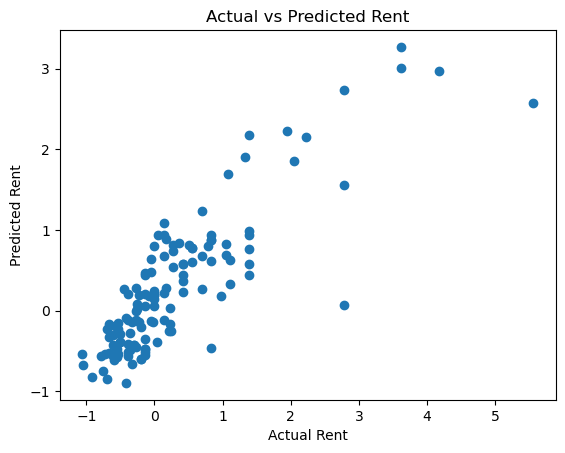

In [14]:
# Visualize the predicted vs actual rent values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual vs Predicted Rent')
plt.show()